In [1]:
# import load_iris function from datasets module
# convention is to import modules instead of sklearn as a whole
from sklearn.datasets import load_iris
import numpy as np

In [2]:
# save "bunch" object containing iris dataset and its attributes
# the data type is "bunch"
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print labels of the dataset
# 0, 1, and 2 represent different species
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)


In [10]:
# use KNN from sklearn as the benchmark
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

/Users/zechengqian/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zechengqian/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

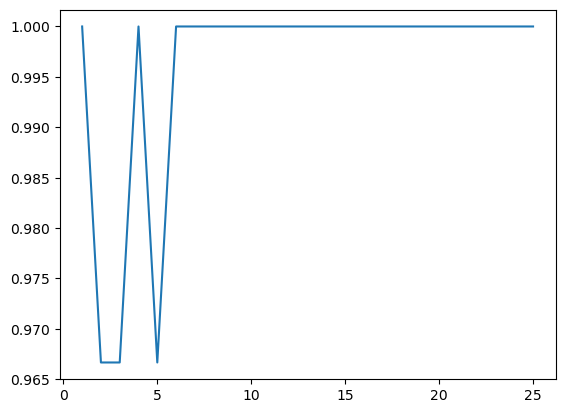

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)

In [12]:
scores_list

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Testing construction and searching runtime for different tree structures

In [65]:
# Use the train set to construct a tree
X_concatenate = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)

### KD-Tree

In [80]:
from kd_tree import KDTree

#### Construction Time

In [81]:
%%time
kd_tree = KDTree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 249 µs, sys: 91 µs, total: 340 µs
Wall time: 341 µs


In [82]:
%%time
kd_tree = KDTree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 315 µs, sys: 178 µs, total: 493 µs
Wall time: 509 µs


In [83]:
%%time
kd_tree = KDTree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 621 µs, sys: 78 µs, total: 699 µs
Wall time: 671 µs


In [85]:
%%time
kd_tree = KDTree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 616 µs, sys: 144 µs, total: 760 µs
Wall time: 677 µs


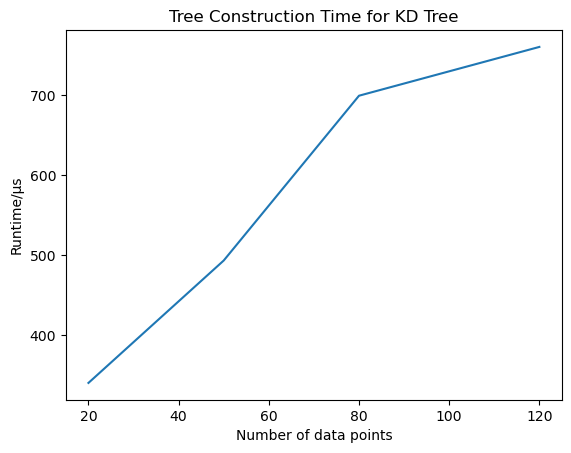

In [134]:
size = [20, 50, 80, 120]
runtime = [340, 493, 699, 760]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for KD Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [89]:
kd_tree = KDTree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [90]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 1.41 ms, sys: 3 µs, total: 1.42 ms
Wall time: 1.42 ms


In [91]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 2.31 ms, sys: 6 µs, total: 2.32 ms
Wall time: 2.33 ms


In [92]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 3.42 ms, sys: 1 µs, total: 3.42 ms
Wall time: 3.44 ms


In [93]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 5.63 ms, sys: 203 µs, total: 5.84 ms
Wall time: 5.97 ms


In [102]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 6.7 ms, sys: 376 µs, total: 7.07 ms
Wall time: 6.72 ms


In [103]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 7.27 ms, sys: 538 µs, total: 7.81 ms
Wall time: 7.33 ms


In [104]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 7.42 ms, sys: 346 µs, total: 7.76 ms
Wall time: 7.42 ms


In [152]:
# Accuracy score
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
    for idx in range(X_test.shape[0]):
        votes = [0, 0, 0]
        pred = kd_tree.get_knn(X_test[idx], k)
        for vote in pred:
            votes[int(vote[-1])] += 1
        y_pred[idx] = np.argmax(votes)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))

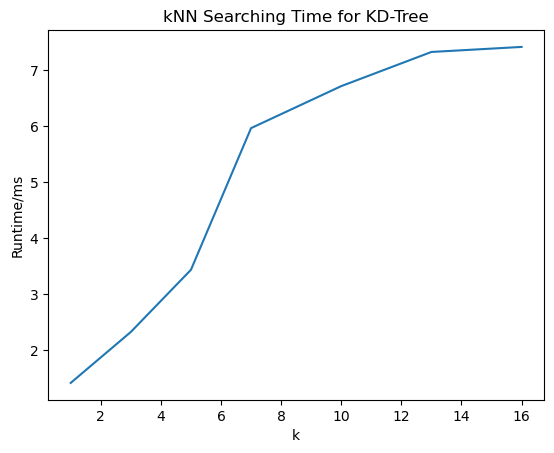

In [133]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [1.42, 2.33, 3.44, 5.97, 6.72, 7.33, 7.42]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for KD-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### Primary Axis Tree

In [109]:
from pa_tree import PATree

#### Construction Time

In [110]:
%%time
pa_tree = PATree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 2.12 ms, sys: 1.22 ms, total: 3.33 ms
Wall time: 2.17 ms


In [111]:
%%time
pa_tree = PATree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 2.83 ms, sys: 1.82 ms, total: 4.65 ms
Wall time: 3.19 ms


In [112]:
%%time
pa_tree = PATree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 3.99 ms, sys: 1.9 ms, total: 5.89 ms
Wall time: 4.21 ms


In [113]:
%%time
pa_tree = PATree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 6.71 ms, sys: 3.48 ms, total: 10.2 ms
Wall time: 7.38 ms


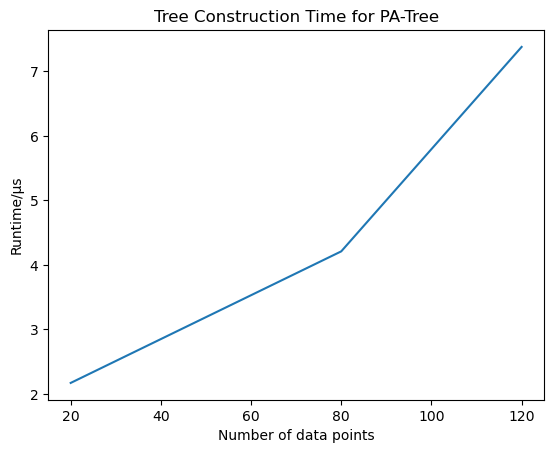

In [132]:
size = [20, 50, 80, 120]
runtime = [2.17, 3.19, 4.21, 7.38]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for PA-Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [117]:
pa_tree = PATree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [118]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 1.4 ms


In [119]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 2.37 ms, sys: 10 µs, total: 2.38 ms
Wall time: 2.4 ms


In [120]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 3.21 ms, sys: 0 ns, total: 3.21 ms
Wall time: 3.22 ms


In [121]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 3.83 ms, sys: 25 µs, total: 3.86 ms
Wall time: 3.89 ms


In [128]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 5.53 ms, sys: 160 µs, total: 5.69 ms
Wall time: 5.6 ms


In [129]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 6.1 ms, sys: 572 µs, total: 6.67 ms
Wall time: 6.12 ms


In [130]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

CPU times: user 7.06 ms, sys: 590 µs, total: 7.65 ms
Wall time: 7.22 ms


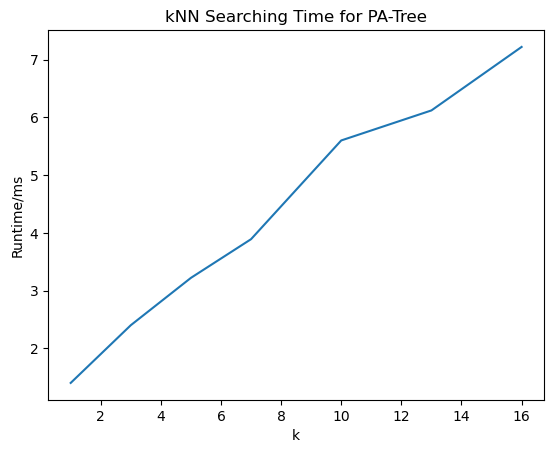

In [135]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [1.4, 2.4, 3.22, 3.89, 5.6, 6.12, 7.22]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for PA-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### PCA Tree

In [136]:
from pca_tree import PCATree

#### Construction Time

In [137]:
%%time
pca_tree = PCATree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 4.37 ms, sys: 1.88 ms, total: 6.26 ms
Wall time: 4.9 ms


In [138]:
%%time
pca_tree = PCATree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 7.13 ms, sys: 2.61 ms, total: 9.74 ms
Wall time: 7.67 ms


In [139]:
%%time
pca_tree = PCATree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 63.2 ms, sys: 3.1 ms, total: 66.3 ms
Wall time: 12 ms


In [140]:
%%time
pca_tree = PCATree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 116 ms, sys: 8.21 ms, total: 125 ms
Wall time: 22.7 ms


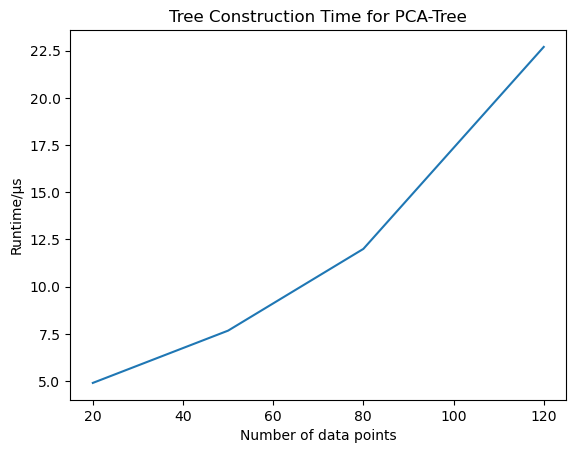

In [141]:
size = [20, 50, 80, 120]
runtime = [4.9, 7.67, 12, 22.7]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for PCA-Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [143]:
pca_tree = PCATree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [145]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 2.17 ms, sys: 11 µs, total: 2.18 ms
Wall time: 2.18 ms


In [146]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 4.35 ms, sys: 1e+03 ns, total: 4.35 ms
Wall time: 4.36 ms


In [147]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 6.13 ms, sys: 136 µs, total: 6.26 ms
Wall time: 6.23 ms


In [148]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 6.82 ms, sys: 427 µs, total: 7.25 ms
Wall time: 6.9 ms


In [149]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 8.21 ms, sys: 385 µs, total: 8.59 ms
Wall time: 8.29 ms


In [150]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 9.53 ms, sys: 931 µs, total: 10.5 ms
Wall time: 9.69 ms


In [151]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 11.2 ms, sys: 878 µs, total: 12.1 ms
Wall time: 11.6 ms


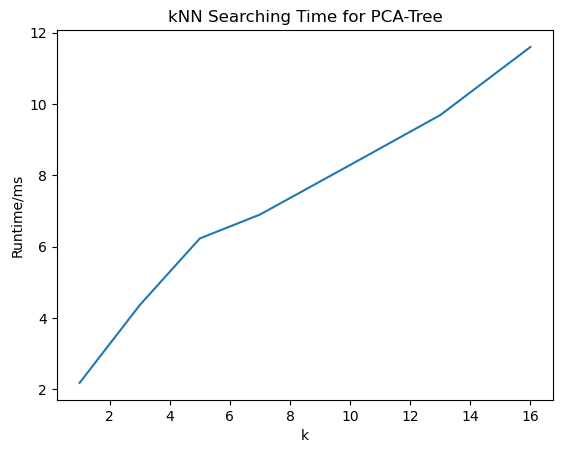

In [155]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [2.18, 4.36, 6.23, 6.9, 8.29, 9.69, 11.6]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for PCA-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### Comparision of Construction Time

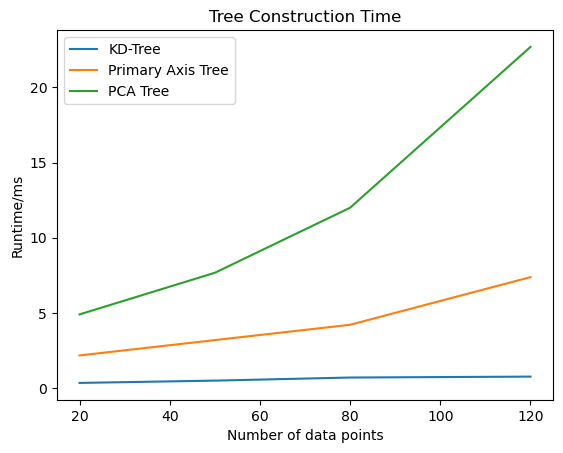

In [164]:
size = [20, 50, 80, 120]
runtime_kd_tree = [0.34, 0.493, 0.699, 0.76]
runtime_pa_tree = [2.17, 3.19, 4.21, 7.38]
runtime_pca_tree = [4.9, 7.67, 12, 22.7]

# %matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/ms')
plt.plot(size, runtime_kd_tree, label='KD-Tree')
plt.plot(size, runtime_pa_tree, label='Primary Axis Tree')
plt.plot(size, runtime_pca_tree, label='PCA Tree')

plt.legend()
plt.savefig('tree_construction.png')

### Comparision of kNN Searching Time

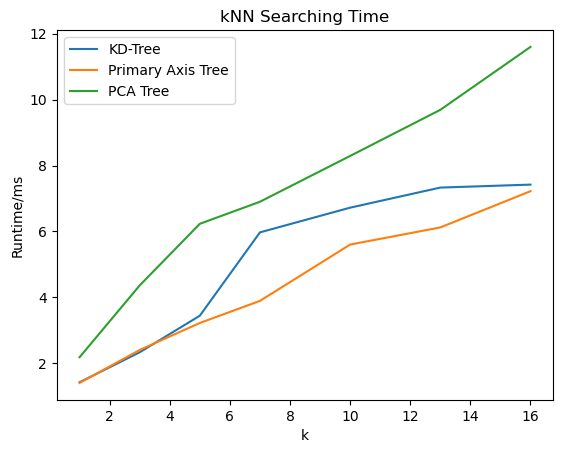

In [166]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime_kd_tree = [1.42, 2.33, 3.44, 5.97, 6.72, 7.33, 7.42]
runtime_pa_tree = [1.4, 2.4, 3.22, 3.89, 5.6, 6.12, 7.22]
runtime_pca_tree = [2.18, 4.36, 6.23, 6.9, 8.29, 9.69, 11.6]

# %matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime_kd_tree, label='KD-Tree')
plt.plot(k, runtime_pa_tree, label='Primary Axis Tree')
plt.plot(k, runtime_pca_tree, label='PCA Tree')

plt.legend()
plt.savefig('kNN_search.png')

## Color Segmentation

In [168]:
import cv2
im = cv2.imread("abc.tiff",mode='RGB')
print(type(im))

ModuleNotFoundError: No module named 'cv2'